In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/email-spam-classification-dataset-csv


In [ ]:
import pandas as pd

dataset_path = "/root/.cache/kagglehub/datasets/balaka18/email-spam-classification-dataset-csv/versions/1/emails.csv"
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(5172, 3002)

In [ ]:
x = df.drop(['Email No.', 'Prediction'], axis = 1)
y = df['Prediction']

<Axes: xlabel='Prediction', ylabel='count'>

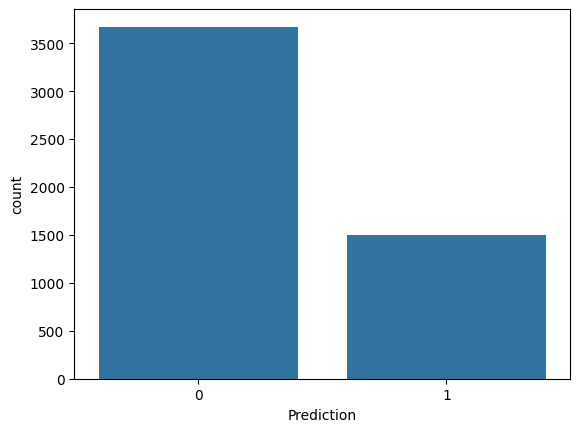

In [ ]:
import seaborn as sns
sns.countplot(x = y)

In [ ]:
y.value_counts()

,count
Prediction,
0,3672
1,1500


In [ ]:
### Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)

In [ ]:
x_scaler

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
### Cross-Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, random_state=0, test_size=0.25)

In [ ]:
x_scaler.shape

(5172, 3000)

In [ ]:
x_train.shape

(3879, 3000)

In [ ]:
x_test.shape

(1293, 3000)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
### Creating Object
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
### Train the algo
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
### Predict on test data
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

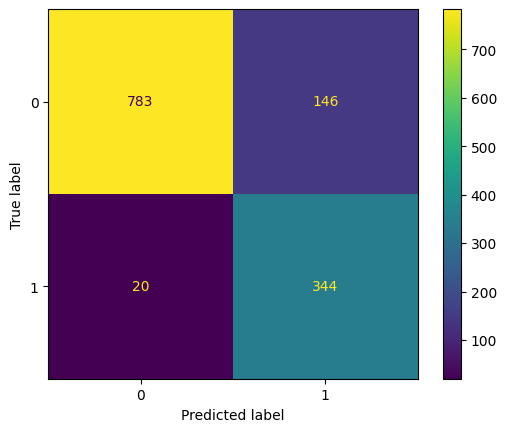

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
y_test.value_counts()

,count
Prediction,
0,929
1,364


In [ ]:
accuracy_score(y_test, y_pred)

0.871616395978345

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='rbf')

In [ ]:
svm.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9450889404485692